# TUTORIAL 01 : CAISO OASIS Renewables

## Renewables and emissions reports

_... renewables reports provide important information about actual renewable 
energy within the ISO grid as California moves towards a 33 percent 
renewable generation portfolio._
</br>
_See: http://www.caiso.com/market/Pages/ReportsBulletins/RenewablesReporting.aspx_

* [Daily Renewables Watch](http://content.caiso.com/green/renewrpt/DailyRenewablesWatch.pdf)
* [CAISO Interface Specification](http://www.caiso.com/Documents/OASIS-InterfaceSpecification_v5_1_8Clean_Independent2019Release.pdf#search=Interface%20Specification)
* [Wind Solar RTD & Curtailment](http://www.caiso.com/Documents/Wind_SolarReal-TimeDispatchCurtailmentReportOct21_2019.pdf#search=Real%20Time%20Dispatch)
* [Daily Renewables Watch (local)](./resources/docs/DailyRenewablesWatch.pdf)
* [CAISO Interface Specification (local)](./resources/docs/OASIS-InterfaceSpecification_v5_1_8Clean_Independent2019Release.pdf)
* [Wind Solar RTD & Curtailment (local)](./resources/docs/Wind_SolarReal-TimeDispatchCurtailmentReportOct21_2019.pdf)

### Setup

In [25]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# make graphs look modern and pretty
import seaborn as sns
sns.set()

# make tables look pretty
# (cribbed from Brandon Rhodes' tutorials)
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

### Renewables : 24 Hour Production

_Monday, October 28, 2019_

![24 Hour Production](./resources/images/renewables-01-24-hour-production.png)

In [ ]:
# create the connection to the unzipped database in this directory
cnx1  = sqlite3.connect(r'./data-oasis-sld-ren-fcst-dam_00.db')

In [ ]:
# Read the database into a dataframe by joining report_header with report_data 
df1 = pd.read_sql("select report_data.trading_hub, report_data.renewable_type, report_data.data_item, report_data.value, report_header.uom, report_header.report, report_header.mkt_type, report_data.interval_start_gmt, report_data.interval_end_gmt from report_header inner join report_data on report_header.report_item_id = report_data.report_item_id;", cnx1)

# Convert gmt time strings to pandas datetime
df1['interval_start_ts'] = pd.to_datetime(df1['interval_start_gmt'])
df1['interval_end_ts'] = pd.to_datetime(df1['interval_end_gmt'])

# Drop unnec gmt columns
df1.drop(['interval_start_gmt', 'interval_end_gmt'], axis='columns', inplace=True)

# Set the index to be the start timestamp
df1 = df1.set_index('interval_start_ts', drop=True)
df1.head()

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 174110 entries, 2016-05-19 07:00:00+00:00 to 2019-10-21 06:00:00+00:00
Data columns (total 8 columns):
trading_hub        174110 non-null object
renewable_type     174110 non-null object
data_item          174110 non-null object
value              174110 non-null float64
uom                174110 non-null object
report             174110 non-null object
mkt_type           174110 non-null object
interval_end_ts    174110 non-null datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(1), object(6)
memory usage: 12.0+ MB


In [28]:
df1.trading_hub.unique()

array(['NP15', 'SP15', 'ZP26'], dtype=object)

In [29]:
df1.renewable_type.unique()

array(['Solar', 'Wind'], dtype=object)

In [30]:
df1.mkt_type.unique()

array(['DAM'], dtype=object)

In [31]:
df1.data_item.unique()

array(['RENEW_FCST_DA_MW'], dtype=object)

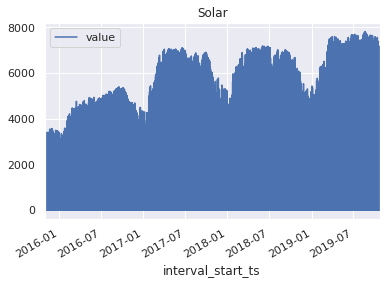

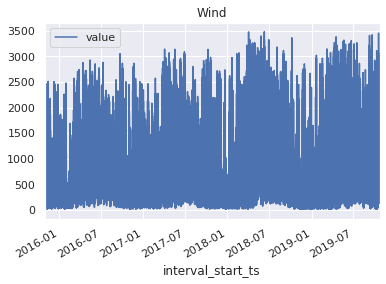

In [32]:
for title, group in df1.groupby(['renewable_type']):
    group.plot.line(y='value', title=title)

![Trading Hubs](./resources/images/caiso-regions.png)

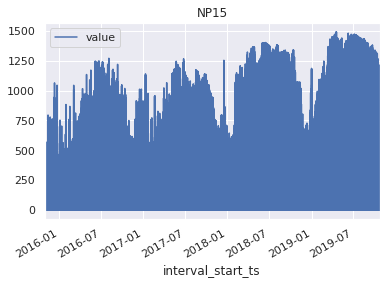

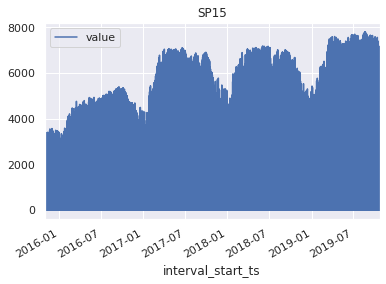

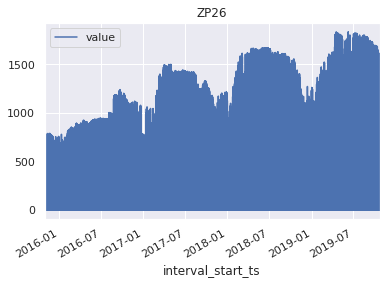

In [33]:
for title, group in df1.groupby(['trading_hub']):
    group.plot.line(y='value', title=title)


### Renewables : Hourly Average Breakdown 

![Hourly Average Breakdown](./resources/images/renewables-02-hourly-average-breakdown.png)

In [34]:
### Renewables : Wind and Solar Summary

In [35]:
# create the connection to the unzipped database in this directory
cnx2  = sqlite3.connect(r'./data-oasis-ene-wind-solar-summary_00.db')

In [36]:
# read the database into a dataframe by joining report_header with report_data 
df2 = pd.read_sql("select report_data.data_item, report_data.value, report_header.uom, report_header.report, report_header.mkt_type, report_data.interval_start_gmt, report_data.interval_end_gmt from report_header inner join report_data on report_header.report_item_id = report_data.report_item_id;", cnx2)

# convert gmt time strings to pandas datetime
df2['interval_start_ts'] = pd.to_datetime(df2['interval_start_gmt'])
df2['interval_end_ts'] = pd.to_datetime(df2['interval_end_gmt'])

# drop unnec gmt columns
df2.drop(['interval_start_gmt', 'interval_end_gmt'], axis='columns', inplace=True)

# set the index to be the start timestamp
df2 = df2.set_index('interval_start_ts', drop=True)
df2.head()

,data_item,value,uom,report,mkt_type,interval_end_ts
interval_start_ts,,,,,,
2016-11-15 07:00:00+00:00,DAM_FORECAST,364.00,MW,ENE_WIND_SOLAR_SUMMARY,DAM,2016-11-15 08:00:00+00:00
2016-11-15 07:00:00+00:00,DAM_NET_VIRTUAL,453.00,MW,ENE_WIND_SOLAR_SUMMARY,DAM,2016-11-15 08:00:00+00:00
2016-11-15 07:00:00+00:00,DAM_SCHEDULE,173.00,MW,ENE_WIND_SOLAR_SUMMARY,DAM,2016-11-15 08:00:00+00:00
2016-11-15 07:00:00+00:00,RTM_SCHEDULE,311.42,MW,ENE_WIND_SOLAR_SUMMARY,RTD,2016-11-15 08:00:00+00:00
2016-11-15 08:00:00+00:00,DAM_FORECAST,612.00,MW,ENE_WIND_SOLAR_SUMMARY,DAM,2016-11-15 09:00:00+00:00


In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 140370 entries, 2016-11-15 07:00:00+00:00 to 2019-10-18 06:00:00+00:00
Data columns (total 6 columns):
data_item          140370 non-null object
value              140370 non-null float64
uom                140370 non-null object
report             140370 non-null object
mkt_type           140370 non-null object
interval_end_ts    140370 non-null datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(1), object(4)
memory usage: 7.5+ MB


In [38]:
df2.data_item.unique()

array(['DAM_FORECAST', 'DAM_NET_VIRTUAL', 'DAM_SCHEDULE', 'RTM_SCHEDULE'],
      dtype=object)

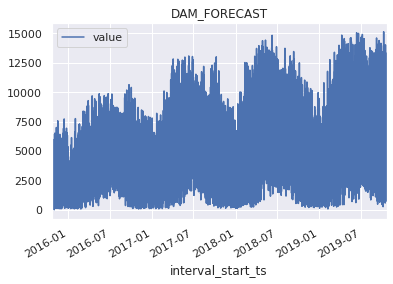

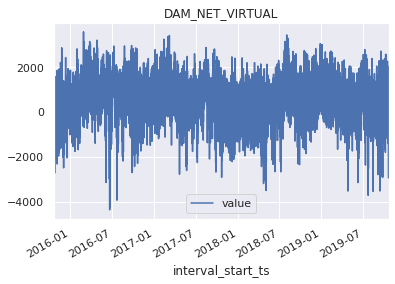

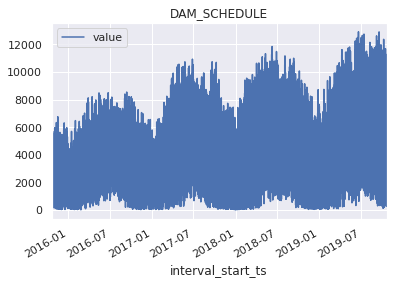

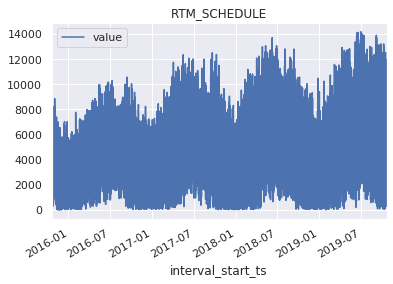

In [39]:
for title, group in df2.groupby(['data_item']):
    group.plot.line(y='value', title=title)

## Data Items Explained

### DAM : Day Ahead Market

http://www.ercot.com/mktinfo/dam/

    Day-Ahead Market

    The Day-Ahead Market (DAM) is a voluntary, financially-binding forward energy market. The DAM matches willing buyers and sellers, subject to network security and     other constraints, whereby energy is co-optimized with Ancillary Services and certain Congestion Revenue Rights. It provides a platform to hedge congestion costs in the day-ahead of the Operating Day, and instruments to mitigate the risk of price volatility in Real-Time.


### RTM : Real Time Market

http://www.ercot.com/mktinfo/rtm

    Real-Time Market

    During real-time, ERCOT dispatches resources based on economics and reliability to meet the system demand while observing resource and transmission constraints. Security Constrained Economic Dispatch (SCED) is the real-time market evaluation of offers to produce a least-cost dispatch of online resources. SCED calculates Locational Marginal Prices (LMPs) using a two-step methodology that applies mitigation to resolve non-competitive constraints.

### RTD : Real Time Dispatch